Trabajo elaborado grupalmente por:

Estudiante 1: antony.mendoza@upch.pe

Estudiante 2: JOHN.RODRIGUES@UPCH.PE

Estudiante 3: LEILY.LLANOS@UPCH.PE

# **PROBLEMA 1**


**Contexto**: Una empresa necesita diseñar una red Metro Ethernet para conectar varias
sucursales en una área metropolitana. Se requiere calidad de servicio (QoS) para priorizar el tráfico de voz sobre IP (VoIP) sobre el tráfico regular de datos.

### **Parte 1**

In [ ]:
!pip install netmiko

In [ ]:
from netmiko import ConnectHandler

In [ ]:
def configure_switch(ip_address, username, password):
  # Crear una conexión al switch
  switch = {
    'device_type': 'cisco_ios',
    'ip': ip_address,
    'username': username,
    'password': password,
    'timeout': 10,
  }
  # Comandos para configurar las VLANs y troncales
  commands = [
    'vlan 10',
    'name DATA',
    'exit',
    'vlan 20',
    'name VOIP',
    'exit',
    'interface range gig0/1-2',
    'switchport trunk encapsulation dot1q',
    'switchport mode trunk',
    'switchport trunk allowed vlan 10,20',
  ]
  try:
      # Iniciar la conexión y enviar comandos
      with ConnectHandler(**switch) as conn:
          output = conn.send_config_set(commands)
          print(output)
  except Exception as e:
      print(f"Error: {e}")
# Ejemplo de uso
configure_switch('192.168.1.100', 'admin', 'password')


Error: TCP connection to device failed.

Common causes of this problem are:
1. Incorrect hostname or IP address.
2. Wrong TCP port.
3. Intermediate firewall blocking access.

Device settings: cisco_ios 192.168.1.100:22




### **Parte 2: Configuración de QoS para priorizar VoIP**

In [ ]:
from netmiko import ConnectHandler
def configure_qos(ip_address, username, password):
  switch = {
    'device_type': 'cisco_ios',
    'ip': ip_address,
    'username': username,
    'password': password,
  }
  qos_commands = [
    'access-list 101 permit ip any any',
    'class-map match-any VOIP',
    'match access-group 101',
    'exit',
    'policy-map VOIP-Policy',
    'class VOIP',
    'set ip dscp ef',
    'exit',
    'interface gig0/1',
    'service-policy output VOIP-Policy',
    "exit"
  ]
  try:
    with ConnectHandler(**switch) as conn:
      output = conn.send_config_set(qos_commands)
      print(output); conn.disconnect()
  except Exception as e:
      print(f"Error: {e}")
# Ejemplo de uso
configure_qos('192.168.1.100', 'admin', 'password')


Error: TCP connection to device failed.

Common causes of this problem are:
1. Incorrect hostname or IP address.
2. Wrong TCP port.
3. Intermediate firewall blocking access.

Device settings: cisco_ios 192.168.1.100:22




## **Parte 3: Simulaciones y análisis**

In [ ]:
!pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=e462b9e46f129f91b4233f9439b56a78d42114e81d7973dd351c8315147b2217
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [ ]:
from scapy.all import *
import time
import random

def send_traffic(destination, dscp, traffic_type, num_packets):
    for _ in range(num_packets):
        if traffic_type == "voip":
            packet = IP(dst=destination, tos=dscp) / UDP(dport=5004) / Raw(b'VoIP Payload')
        elif traffic_type == "data":
            packet = IP(dst=destination, tos=dscp) / TCP(dport=80) / Raw(b'Data Payload')
        send(packet, verbose=False)
        time.sleep(random.uniform(0.01, 0.1))  # Simular una tasa de tráfico realista

# Dirección IP de destino para el tráfico simulado
destination_ip = "192.168.1.100"

# DSCP tag para VoIP y datos
voip_dscp = 0x2E  # Por ejemplo, AF41 (Assured Forwarding)
data_dscp = 0x08  # Por ejemplo, CS1 (Class Selector 1)

# Número de paquetes a enviar para cada tipo de tráfico
num_packets_per_traffic = 100

# Generar tráfico de VoIP y datos
send_traffic(destination_ip, voip_dscp, "voip", num_packets_per_traffic)
send_traffic(destination_ip, data_dscp, "data", num_packets_per_traffic)


# **PROBLEMA 2: Implementación de seguridad en WLAN con tecnología MIMO-OFDM**

**Contexto**: Una universidad desea actualizar su red WLAN para mejorar la cobertura, el
rendimiento y la seguridad. Se decide implementar tecnología MIMO-OFDM y actualizar los protocolos de seguridad a WPA 3.

## **Parte 1: Configuraación MIMO-OFDM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

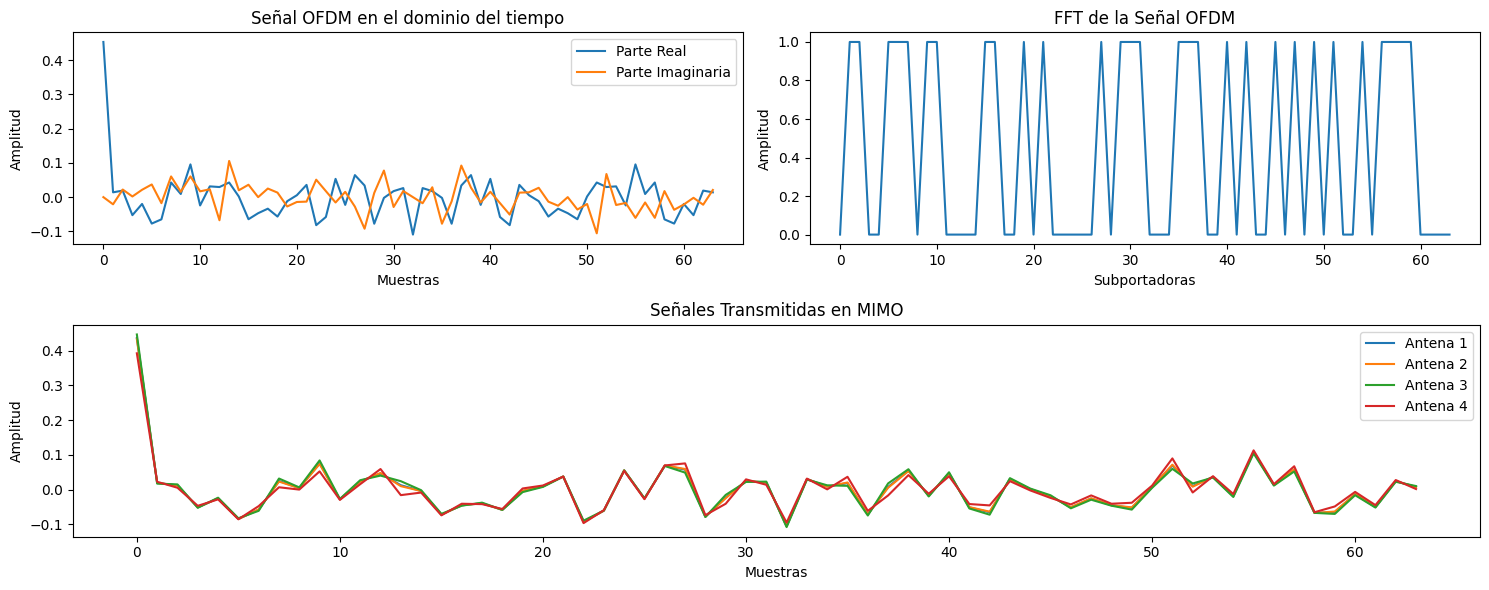

In [ ]:
def simulate_ofdm_signal(num_subcarriers):
    # Crear señales aleatorias para simular datos enviados en cada subportadora
    data = np.random.randint(0, 2, num_subcarriers)
    # OFDM implica la transformada de Fourier inversa para pasar de frecuencia a tiempo
    ofdm_signal = np.fft.ifft(data)
    return ofdm_signal, data

def mimo_transmission(signal, num_antennas):
    # Simular la transmisión desde múltiples antenas
    transmitted_signal = np.tile(signal, (num_antennas, 1))
    # Agregar diversidad de antenas, ejemplo simple
    for i in range(num_antennas):
        transmitted_signal[i, :] *= np.exp(1j * np.random.rand())  # Fase aleatoria por antena
    return transmitted_signal

# Parámetros de simulación
num_subcarriers = 64  # Número de subportadoras en OFDM
num_antennas = 4      # Número de antenas en MIMO

# Simular la señal OFDM
ofdm_signal, data = simulate_ofdm_signal(num_subcarriers)

# Simular la transmisión MIMO
mimo_signal = mimo_transmission(ofdm_signal, num_antennas)

# Cálculo de FFT de la señal OFDM
fft_signal = np.fft.fft(ofdm_signal)

# Gráficas
# Gráfica de la señal OFDM y su FFT
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(np.real(ofdm_signal), label='Parte Real')
plt.plot(np.imag(ofdm_signal), label='Parte Imaginaria')
plt.title('Señal OFDM en el dominio del tiempo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(np.abs(fft_signal))
plt.title('FFT de la Señal OFDM')
plt.xlabel('Subportadoras')
plt.ylabel('Amplitud')

# Gráfica de las señales transmitidas en MIMO
plt.subplot(2, 1, 2)
for i in range(num_antennas):
    plt.plot(np.real(mimo_signal[i]), label=f'Antena {i + 1}')
plt.title('Señales Transmitidas en MIMO')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

## **Parte 2: Configuración y simulación de WPA3**

In [ ]:
!pip install bcrypt

In [ ]:
import bcrypt

In [ ]:
def configure_wpa3(device_config):
  # Simular la configuración de WPA3 en un dispositivo
  print("Configurando WPA3 en el dispositivo\n")
  device_config['security'] = 'WPA3'
  device_config['ssid'] = 'Universidad-RedSegura'

  passwod = 'contraseña_segura_123'
  password = passwod.encode('utf-8')
  salt = bcrypt.gensalt()
  hashed = bcrypt.hashpw(password, salt)
  device_config['password'] = hashed
  return device_config

# Ejemplo de uso
device_config = {}
updated_config = configure_wpa3(device_config)
print(updated_config)

Configurando WPA3 en el dispositivo

{'security': 'WPA3', 'ssid': 'Universidad-RedSegura', 'password': b'$2b$12$BGxsTGXv7xAqlhxZscmlt.MjT.ffiAPQ4yizyURs/bjcijPy4LYuy'}


## Parte 3: Evaluación de la seguridad

# **PROBLEMA 3: Estrategiaas de mitigación para interferencias en redes Ad Hoc Inalámbricaas**

**Contexto**: En un entorno de red ad hoc inalámbrico, los dispositivos sufren de interferencia
co-canal y de problemas de acceso al medio debido a la naturaleza descentralizada de la red.

## **Parte 1: Implementar CSMA/CA en Python**

In [ ]:
import random
import time

def simulate_csma_ca(node_id, attempt_limit=5):
    attempt = 0
    while attempt < attempt_limit:
        # Sensar el medio (simulado por una función que retorna True si el medio está ocupado)
        if is_channel_busy():
            print(f"Node {node_id}: Canal ocupado, aplicando backoff")
            time_to_wait = exponential_backoff(attempt)
            time.sleep(time_to_wait)
            attempt += 1
        else:
            print(f"Node {node_id}: Canal libre, transmitiendo datos")
            send_data(node_id)
            break

def is_channel_busy():
    # Aquí iría la lógica para determinar si el canal está realmente ocupado
    return random.choice([True, False])

def exponential_backoff(attempt):
    return random.randint(0, 2**attempt - 1)

def send_data(node_id):
    print(f"Node {node_id}: Datos enviados exitosamente")

# Ejemplo de uso
simulate_csma_ca(node_id=1)



Node 1: Canal ocupado, aplicando backoff
Node 1: Canal libre, transmitiendo datos
Node 1: Datos enviados exitosamente


## Parte 2: Mitigación de interferencias Co-canal

In [ ]:
def dsss_encode(data, chip_code):
  encoded = []
  for bit in data:
    encoded_bit = [chip * int(bit)
  for chip in chip_code] encoded.extend(encoded_bit)
  return encoded
def dsss_decode(encoded_data, chip_code):
  decoded = [] index = 0
  while index < len(encoded_data):
    segment = encoded_data[index:index+len(chip_code)]
    decoded_bit = 1
    if sum(segment) > len(chip_code)/2
    else 0 decoded.append(decoded_bit) index += len(chip_code)
    return decoded
# Ejemplo de uso data = [1, 0, 1] chip_code = [1, -1, 1, -1, 1, -1] # Ejemplo de un código chip encoded_data = dsss_encode(data, chip_code) decoded_data = dsss_decode(encoded_data, chip_code) print("Encoded Data:", encoded_data) print("Decoded Data:", decoded_data)

## **Parte 3: Mejora del periodo libre de Contención**

In [ ]:
import random

def adjust_contention_window(node_id, success_rate):
    if success_rate < 0.5:
        increase_backoff(node_id)
    else:
        decrease_backoff(node_id)

def increase_backoff(node_id):
    print(f"Node {node_id}: Incrementando el tiempo de backoff debido a baja tasa de éxito")

def decrease_backoff(node_id):
    print(f"Node {node_id}: Disminuyendo el tiempo de backoff debido a alta tasa de éxito")

def contention_window_adjustment(node_id):
    success_rate = calculate_success_rate(node_id)
    adjust_contention_window(node_id, success_rate)

def calculate_success_rate(node_id):
    # Simulación de cálculo de la tasa de éxito
    # Aquí podrías implementar la lógica real basada en datos históricos
    # Por ahora, simplemente generamos un valor aleatorio para la demostración
    return random.random()

# Ejemplo de uso del ajuste de la ventana de contención
node_id = 1
contention_window_adjustment(node_id)


Node 1: Disminuyendo el tiempo de backoff debido a alta tasa de éxito


# **PROBLEMA 4: Análisis y Resolución de problemas de conectividad de una red compleja**

**Contexto**: Una red empresarial compuesta por diferentes segmentos de red, incluyendo
Ethernet, WLAN y VPN, experimenta problemas de conectividad y rendimiento intermitentes.

## **Parte 1: Diagnóstico de problemas Ethernet**

In [ ]:
import random

def simulate_ethernet_traffic():
    # Simular el tráfico de Ethernet y detectar problemas potenciales
    traffic_patterns = ['normal', 'crosstalk', 'jam']
    for _ in range(10):  # Simular 10 ciclos de tráfico
        traffic_type = random.choice(traffic_patterns)
        if traffic_type == 'crosstalk':
            print("¡Crosstalk detectado! Ajustando configuraciones de cableado.")
            # Aquí iría el código para resolver el crosstalk
        elif traffic_type == 'jam':
            print("¡Se detectó una señal de jam! Restableciendo interfaces de Ethernet.")
            # Aquí iría el código para restablecer las interfaces
        else:
            print("Tráfico normal.")

simulate_ethernet_traffic()



¡Crosstalk detectado! Ajustando configuraciones de cableado.
¡Se detectó una señal de jam! Restableciendo interfaces de Ethernet.
Tráfico normal.
¡Crosstalk detectado! Ajustando configuraciones de cableado.
¡Crosstalk detectado! Ajustando configuraciones de cableado.
¡Crosstalk detectado! Ajustando configuraciones de cableado.
Tráfico normal.
Tráfico normal.
¡Crosstalk detectado! Ajustando configuraciones de cableado.
¡Crosstalk detectado! Ajustando configuraciones de cableado.


## **Parte 2: Optimización de WLAN**

In [ ]:
import random

def simulate_roaming(user, access_points):
    current_ap = None
    print(f"{user} starts connection attempt...")

    for ap in access_points:
        if random.random() > 0.5:  # Simula la probabilidad de conectarse a un punto de acceso
            current_ap = ap
            print(f"{user} connected to {ap}")
            break

    if not current_ap:
        print(f"{user} could not connect to any access point.")

simulate_roaming('User1', ['AP1', 'AP2', 'AP3'])



User1 starts connection attempt...
User1 connected to AP1


## **Parte 3: Configuración y optimización de VPN**

In [ ]:
def configure_vpn_settings(vpn_connection):
    print("Configuring VPN...")
    vpn_connection['latency_reduction'] = True
    vpn_connection['bandwidth_optimization'] = True
    return vpn_connection

# Ejemplo de uso
vpn_settings = configure_vpn_settings({})
print("VPN Settings Adjusted:", vpn_settings)


Configuring VPN...
VPN Settings Adjusted: {'latency_reduction': True, 'bandwidth_optimization': True}
